**Exercise 1:**
Develop a tree based model for predicting whether the customer will take pep using the customer profile data given in bank-data.csv? Use 80% of data to develop the model and validate the model using the remaining 20% of data?

In [1]:
#Import packages
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
#Import data
data = pd.read_csv('bank-data.csv')

In [4]:
#explore the dataset
data.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,1,0,17546.0,0,1,0,0,0,0,1
1,40,0,3,30085.1,1,3,1,0,1,1,0
2,51,1,0,16575.4,1,0,1,1,1,0,0
3,23,1,3,20375.4,1,3,0,0,1,0,0
4,57,1,1,50576.3,1,0,0,1,0,0,0


In [5]:
#Check the structure of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          600 non-null    int64  
 1   sex          600 non-null    int64  
 2   region       600 non-null    int64  
 3   income       600 non-null    float64
 4   married      600 non-null    int64  
 5   children     600 non-null    int64  
 6   car          600 non-null    int64  
 7   save_act     600 non-null    int64  
 8   current_act  600 non-null    int64  
 9   mortgage     600 non-null    int64  
 10  pep          600 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 51.7 KB


There are 600 observations in the dataset. No null value is present. Total number of explanatory features = 10, Total response variable = 1

In [6]:
#Separate x's and y
x = data.iloc[:,0:10]
y = data.iloc[:,10]

In [7]:
#Split the data into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [8]:
#Check the test train split
y_train.count()

480

In [9]:
#Specify the default model
model =tree.DecisionTreeClassifier(min_samples_split=50)

**max_depth :**

int, default=None

    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure (contains 1 element) or until all leaves contain less than
    min_samples_split samples.





**min_samples_split :**

int or float, default=2

  The minimum number of samples required to split an internal node:
  - If int, then consider `min_samples_split` as the minimum number.
  - If float, then `min_samples_split` is a fraction and
      `ceil(min_samples_split * n_samples)` are the minimum
      number of samples for each split.
      
default=2 means consequent leaves can have max 1 element each.

**min_samples_leaf :**

int or float, default=1
    The minimum number of samples required to be at a leaf node.
    A split point at any depth will only be considered if it leaves at
    least ``min_samples_leaf`` training samples in each of the left and
    right branches.  This may have the effect of smoothing the model,
    especially in regression.

   - If int, then consider `min_samples_leaf` as the minimum number.
   - If float, then `min_samples_leaf` is a fraction and
      `ceil(min_samples_leaf * n_samples)` are the minimum
      number of samples for each node.



In [10]:
#Fit the model to training data
model = model.fit(x_train,y_train)

In [11]:
#Model accuarcy
accuracy = model.score(x_train,y_train)
round(accuracy,3)

0.835

In [12]:
#Hyper parameter tuning
paramgrid = [{'criterion':['gini','entropy'],'min_samples_split':[35,40,45,50,55,60,65]}]

**criterion :**

{"gini", "entropy"}, default="gini"

    The function to measure the quality of a split.
    
Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.

Gini index and entropy is the criterion for calculating information gain. Decision tree algorithms use information gain to split a node.

Both gini and entropy are measures of impurity of a node. A node having multiple classes is impure whereas a node having only one class is pure.  Entropy in statistics is analogous to entropy in thermodynamics where it signifies disorder. If there are multiple classes in a node, there is disorder in that node. Entropy is the measure of the impurity of a set of data,alternatively we can think of this as the measure of the disorder or uncertainty of a group.


Information gain is the entropy of parent node minus sum of weighted entropies of child nodes. 

Weight of a child node is number of samples in the node/totalsamples of all child nodes. Similarly information gain is calculated with gini score.



In [13]:
# Set up search
search = GridSearchCV(estimator=model,param_grid=paramgrid,scoring='accuracy',cv=5,verbose=True)

In [14]:
#Fit the search on training data
search = search.fit(X=x_train,y=y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


In [15]:
# Optimum parameter values
search.best_params_

{'criterion': 'entropy', 'min_samples_split': 35}

In [16]:
# Specify the optimum model
model = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=35)

In [18]:
# Fit the model to training data
model = model.fit(X=x_train,y=y_train)

In [19]:
# Check the model accuracy
model.score(x_train,y_train)

0.84375

So, there is some improvement in model accuracy after hyper parameter optimization.

In [20]:
# Predicted Values
predy = model.predict(X=x_train)

In [21]:
# Actual Vs Predicted table
table = confusion_matrix(y_train,predy)
table

array([[243,  19],
       [ 56, 162]])

In [22]:
#Accuracy computation
accuracy = (table[0][0]+table[1][1])/table.sum()

In [23]:
#Validate the model on test data
predtest = model.predict(X=x_test)

In [24]:
#Accuracy of the model on test data - generalizability
test_accuracy = model.score(X=x_test,y=y_test)
test_accuracy

0.8083333333333333

In [25]:
# Actual vs predicted table for test data
testtable = confusion_matrix(y_test,predtest)
testtable

array([[60,  4],
       [19, 37]])

In [26]:
#Accuracy computation of test data
test_accuracy = (testtable[0][0]+testtable[1][1])/testtable.sum()
test_accuracy

0.8083333333333333

|Data|Accuracy|Misclassification error|
|-|-|-|
|Training|84.38|15.62|
|Test|80.83|19.17|



In [28]:
#Text representation of model
text_representation = tree.export_text(decision_tree=model)
print(text_representation)

|--- feature_3 <= 29669.75
|   |--- feature_5 <= 1.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- feature_4 <= 0.50
|   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  0.50
|   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |--- feature_0 <= 59.00
|   |   |   |   |   |   |--- feature_3 <= 23471.75
|   |   |   |   |   |   |   |--- feature_3 <= 14050.55
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_3 >  14050.55
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_3 >  23471.75
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  59.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_5 >  0.50
|   |   |   |--- feature_3 <= 15576.45
|   |   |   |   |--- class: 0
|   |   |   |--

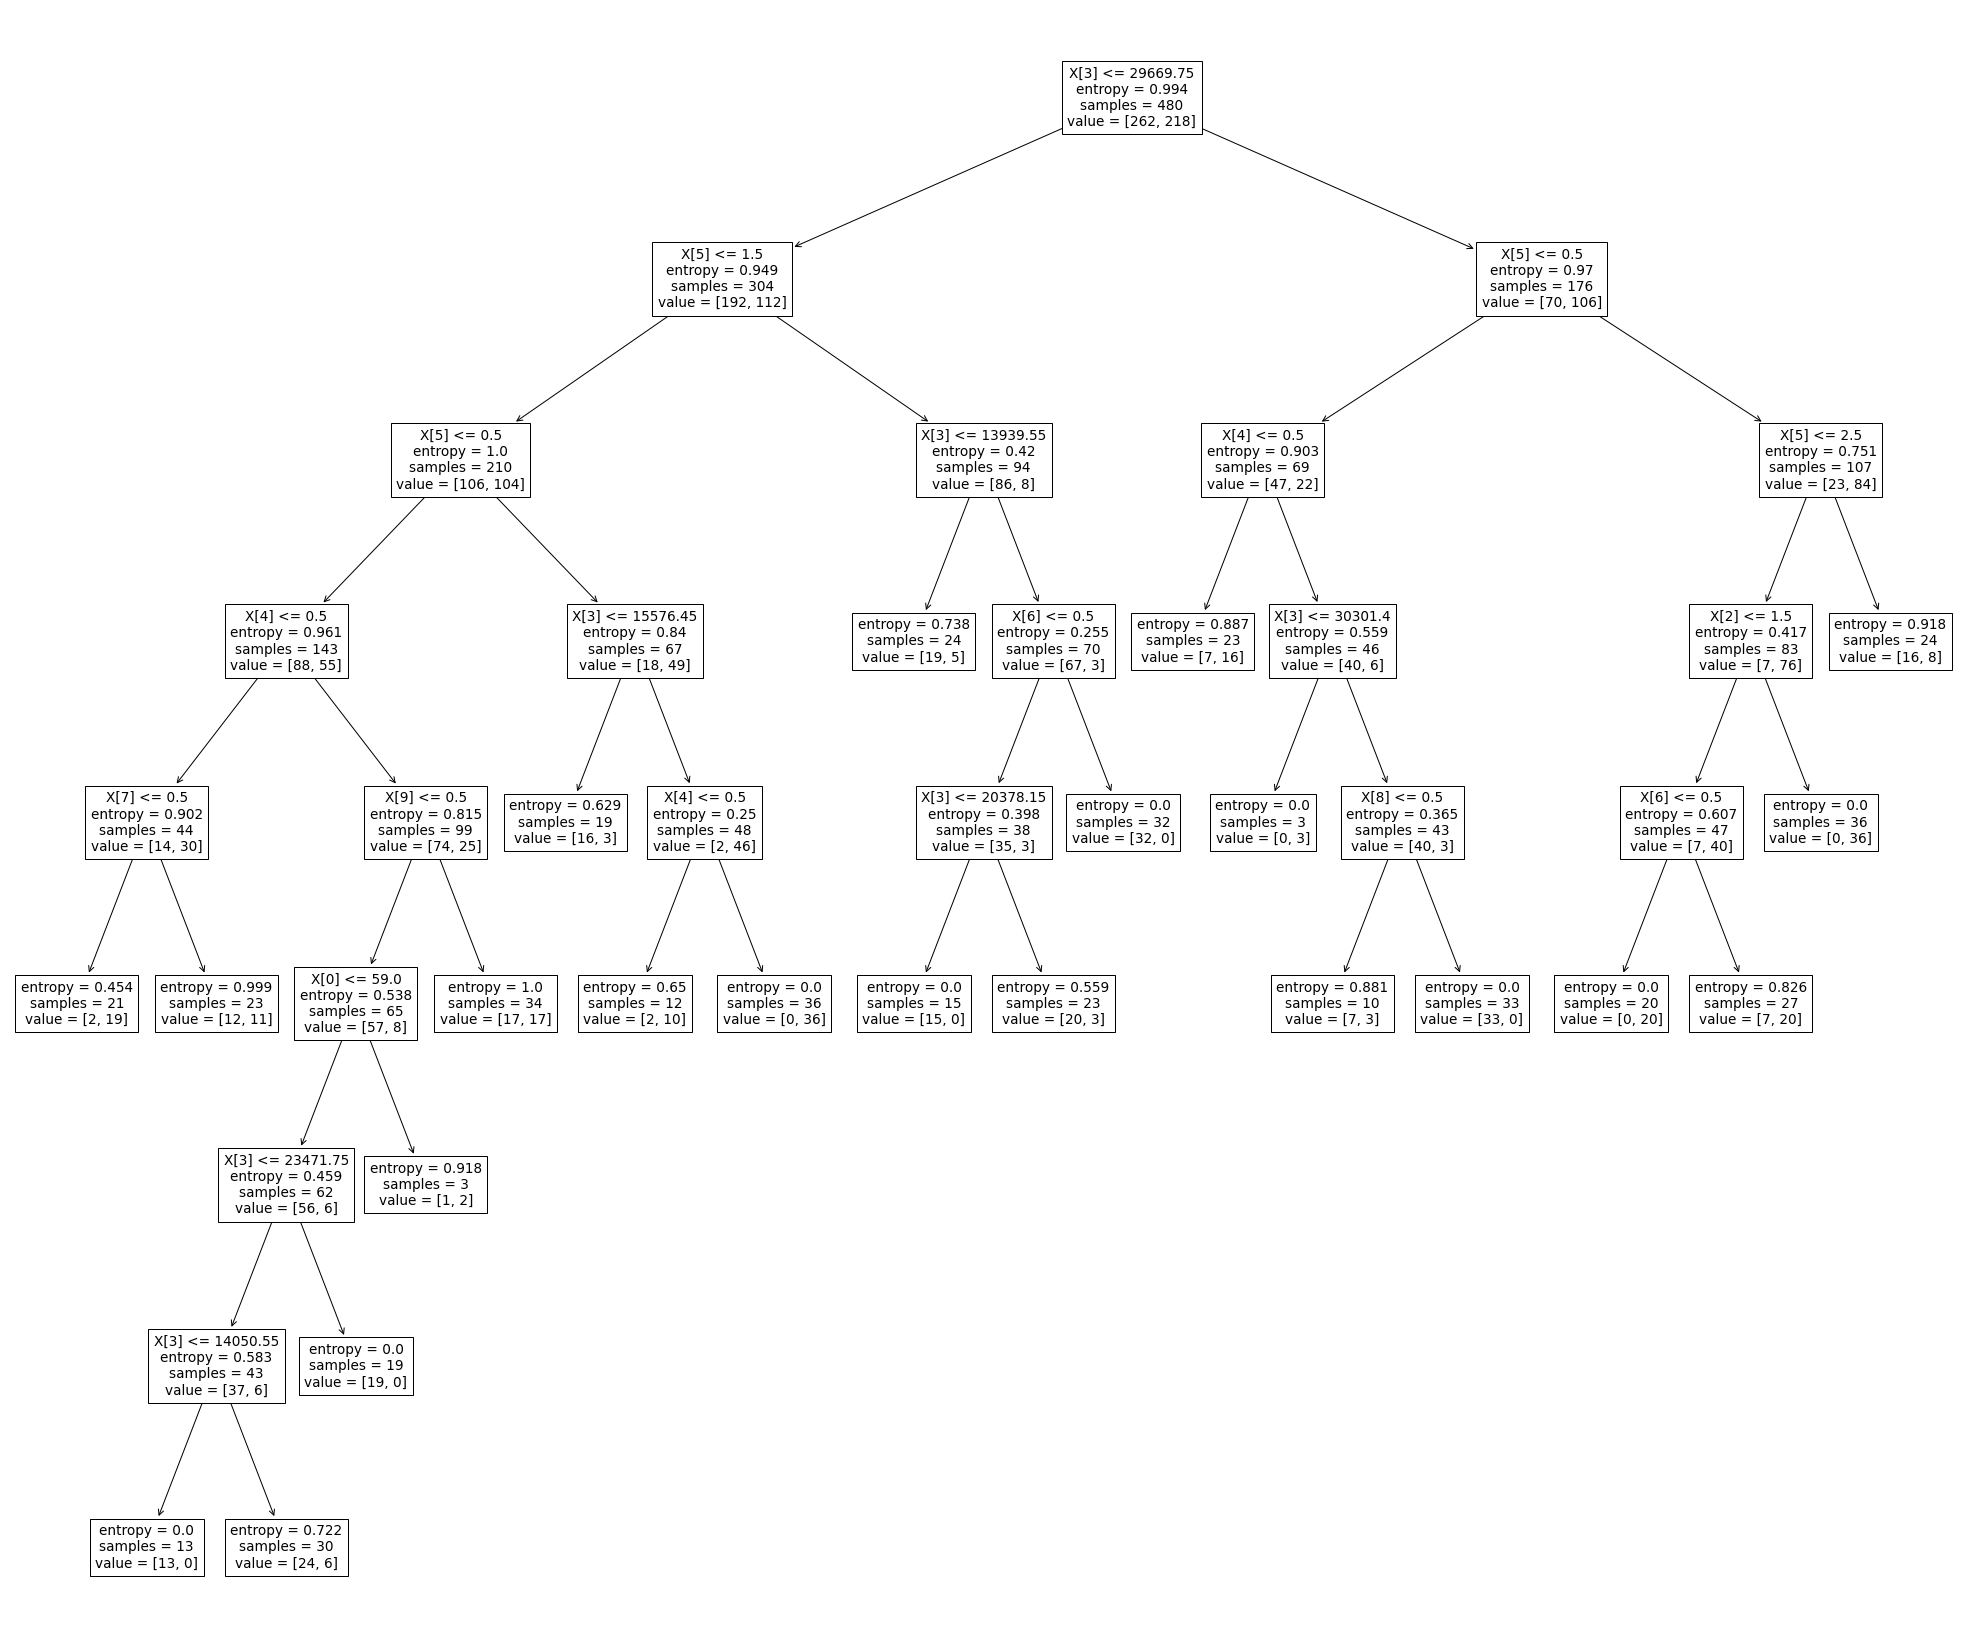

In [29]:
#Plot tree
plt.figure(figsize=(35,30))
tree.plot_tree(decision_tree=model)
plt.show()

Reading the tree:

x[3] <= 29669.75 goes to the left of the tree.

x[3] > 29669.75 goes to the right of the tree.

**Plotting Decision Tree using export_graphviz**

In [27]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(mymodel, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

**Need to figure out the issue**